# Supercritical Steam Cycle Example

This example uses Jupyter Lab or Jupyter notebook, and demonstrates a supercritical pulverized coal (SCPC) steam cycle model.  See the ```supercritical_steam_cycle.py``` to see more information on how to assemble a power plant model flowsheet. Code comments in that file will guide you through the process.

## Model Description

The example model doesn't represent any particular power plant, but should be a reasonable approximation of a typical plant.  The gross power output is about 620 MW.  The process flow diagram (PFD) can be shown using the code below. The initial PFD contains spaces for model results, to be filled in later.

To get a more detailed look at the model structure, you may find it useful to review ```supercritical_steam_cycle.py``` first. Although there is no detailed boiler model, there are constraints in the model to complete the steam loop through the boiler and calculate boiler heat input to the steam cycle.  The efficiency calculation for the steam cycle doesn't account for heat loss in the boiler, which would be a result of a more detailed boiler model.

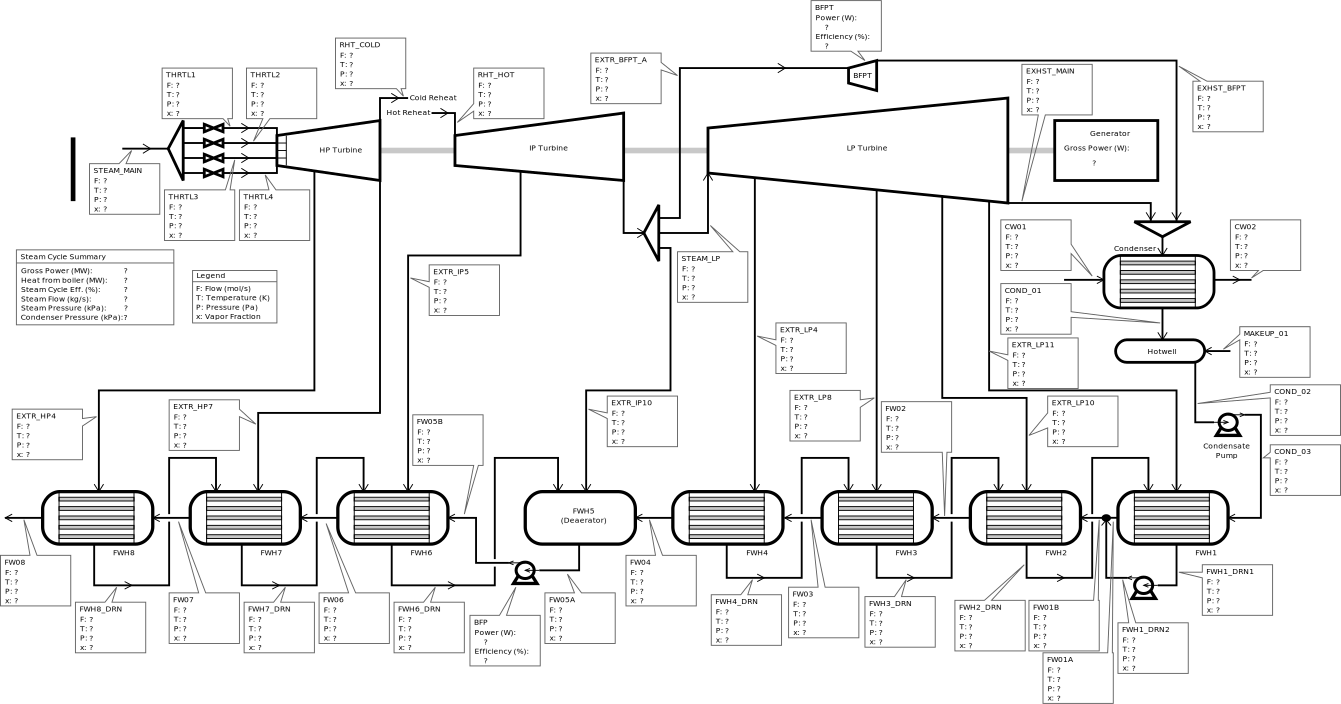

In [1]:
# pkg_resources is used here to get the svg information from the 
# installed IDAES package

import pkg_resources
from IPython.display import SVG, display

# Get the contents of the PFD (which is an svg file) 
init_pfd = pkg_resources.resource_string(
    "idaes.power_generation.flowsheets.supercritical_steam_cycle",
    "supercritical_steam_cycle.svg"
)

# Make the svg contents into an SVG object and display it.
display(SVG(init_pfd))

## Initialize the steam cycle flowsheet

This example is part of the ```idaes``` package, which you should have installed.  To run the example, the example flowsheet is imported from the ```idaes``` package. When you write your own model, you can import and run it in whatever way is appropriate for you.  The Pyomo environment is also imported as ```pyo```, providing easy access to Pyomo functions and classes.

The supercritical flowsheet example main function returns a Pyomo concrete mode (m) and a solver object (solver).  The model is also initialized by the ```main()``` function.

In [2]:
import pyomo.environ as pyo
from idaes.power_generation.flowsheets.supercritical_steam_cycle import (
    main,
    create_stream_table_dataframe,
    pfd_result,
)
    
m, solver = main()

2020-09-04 15:06:22 [WARNING] idaes.core.property_meta: DEPRECATED: IDAES is moving to using Pyomo Units when defining default units, which are used to automatically determine units of measurement for quantities and convert where necessary. Users are strongly encouraged to convert their property packages to use Pyomo Units objects.
2020-09-04 15:06:22 [WARNING] idaes.core.property_meta: DEPRECATED: IDAES is moving to using Pyomo Units when defining default units, which are used to automatically determine units of measurement for quantities and convert where necessary. Users are strongly encouraged to convert their property packages to use Pyomo Units objects.
2020-09-04 15:06:25 [WARNING] idaes.core.util.scaling: Accessing missing scaling factor for fs.condenser.overall_heat_transfer_coefficient[0.0]
2020-09-04 15:06:25 [WARNING] idaes.core.util.scaling: Accessing missing scaling factor for fs.condenser.area
2020-09-04 15:06:26 [WARNING] idaes.core.util.scaling: Accessing missing scali

2020-09-04 15:06:31 [INFO] idaes.init.fs.turb.inlet_stage[1]: Initialization Complete: optimal - Optimal Solution Found
2020-09-04 15:06:31 [INFO] idaes.init.fs.turb.inlet_stage[2]: Initialization Complete: optimal - Optimal Solution Found
2020-09-04 15:06:31 [INFO] idaes.init.fs.turb.inlet_stage[3]: Initialization Complete: optimal - Optimal Solution Found
2020-09-04 15:06:31 [INFO] idaes.init.fs.turb.inlet_stage[4]: Initialization Complete: optimal - Optimal Solution Found
2020-09-04 15:06:31 [INFO] idaes.init.fs.turb.inlet_mix: Initialization Complete: optimal - Optimal Solution Found
2020-09-04 15:06:32 [INFO] idaes.init.fs.turb.hp_split[4]: Initialization Complete: optimal - Optimal Solution Found
2020-09-04 15:06:32 [INFO] idaes.init.fs.turb.hp_split[7]: Initialization Complete: optimal - Optimal Solution Found
2020-09-04 15:06:32 [INFO] idaes.init.fs.turb.ip_split[5]: Initialization Complete: optimal - Optimal Solution Found
2020-09-04 15:06:33 [INFO] idaes.init.fs.turb.ip_split

2020-09-04 15:06:37 [INFO] idaes.init.fs.fwh1: Condensing shell inlet delta T = 16.329858829425035
2020-09-04 15:06:37 [INFO] idaes.init.fs.fwh1: Condensing Shell outlet delta T = 30.71648562473314
2020-09-04 15:06:37 [INFO] idaes.init.fs.fwh1: Steam Flow = 1404.222019573027
2020-09-04 15:06:37 [INFO] idaes.init.fs.fwh1: Initialization Complete: optimal - Optimal Solution Found
2020-09-04 15:06:37 [DEBUG] idaes.solve.fs.fwh1_pump: Ipopt 3.13.2: tol=1e-07
2020-09-04 15:06:37 [DEBUG] idaes.solve.fs.fwh1_pump: linear_solver=ma27
2020-09-04 15:06:37 [DEBUG] idaes.solve.fs.fwh1_pump: max_iter=40
2020-09-04 15:06:37 [DEBUG] idaes.solve.fs.fwh1_pump: ******************************************************************************
2020-09-04 15:06:37 [DEBUG] idaes.solve.fs.fwh1_pump: This program contains Ipopt, a library for large-scale nonlinear optimization.
2020-09-04 15:06:37 [DEBUG] idaes.solve.fs.fwh1_pump: Ipopt is released as open source code under the Eclipse Public License (EPL).
2020

2020-09-04 15:06:40 [INFO] idaes.init.fs.fwh3.drain_mix: Initialization Complete: optimal - Optimal Solution Found
2020-09-04 15:06:40 [WARNING] idaes.init.fs.fwh3: The steam sat. temperature (347.7746043121486) is near the feedwater inlet temperature (319.0660781963397)
2020-09-04 15:06:40 [INFO] idaes.init.fs.fwh3.condense.side_1: Initialization Complete
2020-09-04 15:06:40 [INFO] idaes.init.fs.fwh3.condense.side_2: Initialization Complete
2020-09-04 15:06:40 [INFO] idaes.init.fs.fwh3.condense: Initialization Completed, optimal - Optimal Solution Found
2020-09-04 15:06:40 [INFO] idaes.init.fs.fwh3.condense: Initialization Complete (w/ extraction calc): optimal - Optimal Solution Found
2020-09-04 15:06:40 [INFO] idaes.init.fs.fwh3.cooling.side_1: Initialization Complete
2020-09-04 15:06:40 [INFO] idaes.init.fs.fwh3.cooling.side_2: Initialization Complete
2020-09-04 15:06:41 [INFO] idaes.init.fs.fwh3.cooling: Initialization Completed, optimal - Optimal Solution Found
2020-09-04 15:06:4

    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        computation. See http://www.hsl.rl.ac.uk.
******************************************************************************

This is Ipopt version 3.13.2, running with linear solver ma27.

Number of nonzeros in equality constraint Jacobian...:     2322
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      815

Total number of variables............................:      860
                     variables with only lower bounds:        1
                variables with lower and upper bounds:      444
                     variables with only upper bounds:        0
Total number of equality constraints.................:      860
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bound

Inside the model, there is a subblock ```fs```.  This is an IDAES flowsheet model, which contains the supercritical steam cycle model. In the flowsheet, the model called ```turb``` is a multistage turbine model.  The turbine model contains an expression for total power, ```power```.  In this case the model is steady-state, but all IDAES models allow for dynamic simulation, and contain time indexes.  Power is indexed by time, and only the "0" time point exists.  By convention, in the IDAES framework, power going into a model is positive, so power produced by the turbine is negative.  

The property package used for this model uses SI (mks) units of measure, so the power is in Watts. Here a function is defined which can be used to report power output in MW.

In [3]:
# Define a function to report gross power output in MW
def gross_power_mw(model):
    # pyo.value(m.fs.turb.power[0]) is the power consumed in Watts
    return -pyo.value(model.fs.turb.power[0])/1e6

# Show the gross power
gross_power_mw(m)

635.6313375904779

## Change the model inputs

The turbine in this example simulates partial arc admission with four arcs, so there are four throttle valves.  For this example, we will close one of the valves to 25% open, and observe the result.

In [4]:
m.fs.turb.throttle_valve[1].valve_opening[:].value = 0.25

Next, we re-solve the model using the solver created by the ```supercritical_steam_cycle.py``` script.

In [5]:
solver.solve(m, tee=True)

Ipopt 3.13.2: tol=1e-07
linear_solver=ma27
max_iter=40


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale sc

{'Problem': [{'Lower bound': -inf, 'Upper bound': inf, 'Number of objectives': 1, 'Number of constraints': 860, 'Number of variables': 860, 'Sense': 'unknown'}], 'Solver': [{'Status': 'ok', 'Message': 'Ipopt 3.13.2\\x3a Optimal Solution Found', 'Termination condition': 'optimal', 'Id': 0, 'Error rc': 0, 'Time': 4.005006313323975}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

Now we can check the gross power output again.

In [6]:
gross_power_mw(m)

603.4597182456536

## Creating a PFD with results and a stream table

A more detailed look at the model results can be obtained by creating a stream table and putting key results on the PFD.  Of course, any unit model or stream result can be obtained from the model.

In [7]:
# Create a Pandas dataframe with stream results
df = create_stream_table_dataframe(streams=m._streams, orient="index")

# Create a new PFD with simulation results
res_pfd = pfd_result(m, df, svg=init_pfd)

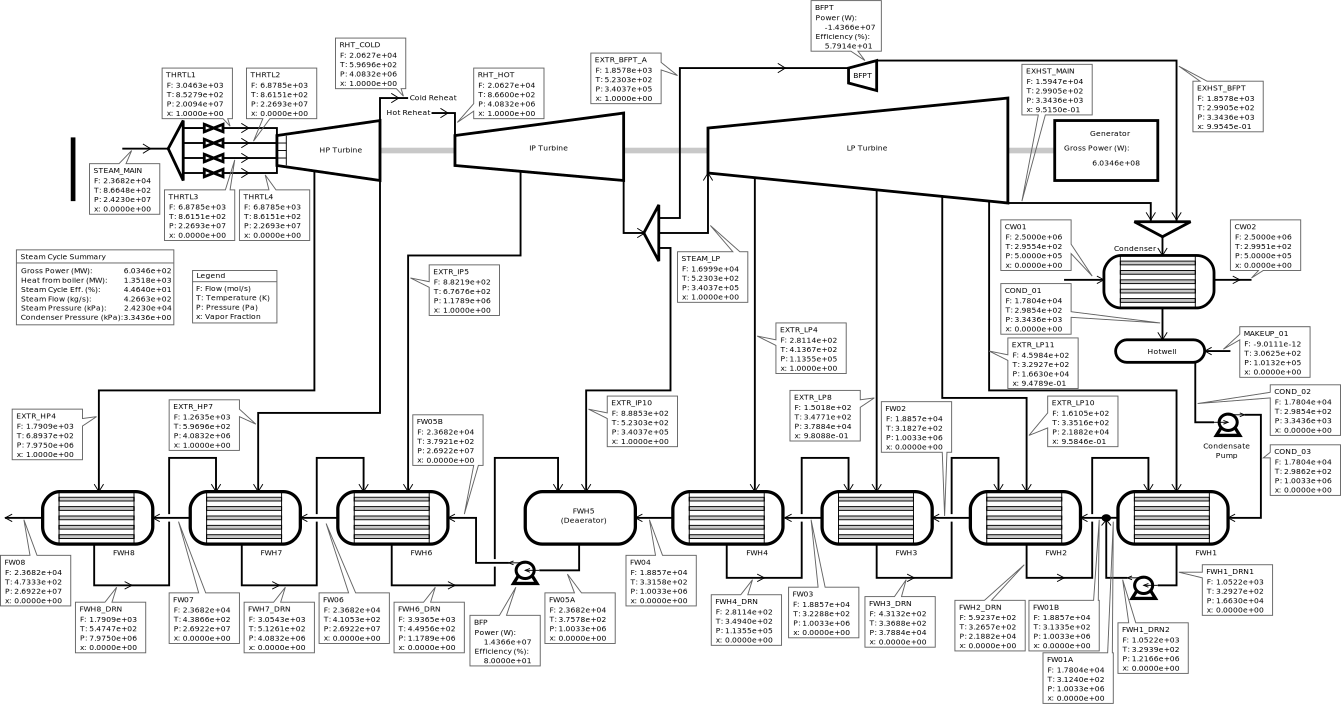

In [8]:
# Display PFD with results.
display(SVG(res_pfd))

In [9]:
# Display the stream table.
df

,Molar Flow (mol/s),Mass Flow (kg/s),T (K),P (Pa),Vapor Fraction,Molar Enthalpy (J/mol) Vap,Molar Enthalpy (J/mol) Liq
COND_01,1.780439e+04,3.207510e+02,298.536846,3.343617e+03,0.000000,4.588768e+04,1917.672297
COND_02,1.780439e+04,3.207510e+02,298.536846,3.343617e+03,0.000000,4.588768e+04,1917.672297
COND_03,1.780439e+04,3.207510e+02,298.615581,1.003344e+06,0.000000,-1.694084e+06,1940.256297
CW01,2.500000e+06,4.503820e+04,295.536846,5.000000e+05,0.000000,3.633362e+04,1700.000000
CW02,2.500000e+06,4.503820e+04,299.513969,5.000000e+05,0.000000,-8.856821e+06,1999.524995
EXHST_BFPT,1.857763e+03,3.346812e+01,299.048619,3.343617e+03,0.995449,4.590532e+04,1956.223125
EXHST_MAIN,1.594662e+04,2.872829e+02,299.048619,3.343617e+03,0.951502,4.590532e+04,1956.223125
EXTR_BFPT_A,1.857763e+03,3.346812e+01,523.033701,3.403677e+05,1.000000,5.343808e+04,19553.642631
EXTR_HP4,1.790876e+03,3.226313e+01,689.370669,7.975031e+06,1.000000,5.737024e+04,128500.182060
EXTR_HP7,1.263472e+03,2.276180e+01,596.958703,4.083216e+06,1.000000,5.447815e+04,27378.691744
